In [1]:
import pandas as pd
df = pd.read_csv('df_3.csv')
df = df.drop(df.columns[0], axis=1)

In [2]:
df

,MAV,RMS,VAR,WL,ZC,SSC,WAMP,SSI,SD,ASM,...,PF,BAND,SE,PERE,SAMPE,FUE,APE,AMAX,PMI,HFMI
0,0.000749,0.001197,0.000001,0.783570,354.7,370.9,824.9,0.001349,0.001197,0.697925,...,172.656250,51.562500,3.660000e-10,0.693058,0.000858,-0.000116,0.002119,0.007650,0.622264,0.088612
1,0.000971,0.001566,0.000002,0.883043,305.6,315.1,687.0,0.001917,0.001566,0.756038,...,211.718750,35.156250,7.780000e-10,0.692949,0.002565,0.000960,0.002683,0.010149,0.226047,0.133873
2,0.001250,0.002758,0.000008,1.363007,379.1,395.3,791.0,0.007511,0.002758,1.230930,...,173.046875,19.531250,2.350000e-09,0.692977,0.019483,0.017839,0.005184,0.024444,0.083882,0.291747
3,0.000756,0.001395,0.000002,0.744630,337.9,348.7,760.2,0.001736,0.001395,0.665652,...,172.265625,38.281250,5.140000e-10,0.693089,0.002265,0.001156,0.002607,0.012045,0.092350,0.264810
4,0.000684,0.001285,0.000002,0.692725,348.7,358.8,757.7,0.001483,0.001285,0.608639,...,188.281250,42.578125,4.420000e-10,0.693038,0.002246,0.001821,0.002597,0.010396,0.091477,0.295575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.017079,0.035129,0.001281,10.176751,191.8,206.1,289.6,0.671450,0.035129,8.949620,...,200.000000,55.078125,3.200000e-07,0.693096,0.614775,0.529215,0.125710,0.182629,0.414768,0.168676
444,0.001857,0.002349,0.000006,1.183963,213.5,219.4,518.2,0.003140,0.002349,1.032638,...,198.437500,53.125000,1.500000e-09,0.692981,0.001439,-0.000320,0.003154,0.007704,0.578510,0.055556
445,0.018708,0.042452,0.001879,15.408637,274.7,294.6,303.6,1.394276,0.042452,13.881702,...,171.875000,35.156250,5.620000e-07,0.693026,0.304919,0.276643,0.411739,0.252674,0.207992,0.243280
446,0.001583,0.002811,0.000008,1.464070,315.6,324.0,726.1,0.006572,0.002811,1.313666,...,168.359375,32.031250,2.430000e-09,0.693053,0.005527,0.005415,0.003919,0.021141,0.125318,0.140808


In [3]:
# 添加一个名为 'label' 的列，并将前80行的值设为 0，其余的设为 1
df['label'] = 0
df.loc[80:, 'label'] = 1
# 将 'label' 列移动到数据集的第一列
df = df[['label'] + [col for col in df.columns if col != 'label']]

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 1. 计算每个特征的平均值
mean_values = df.mean()

# 2. 将异常值替换为平均值
df_no_outliers = df.copy()
for column in df_no_outliers.columns:
    column_mean = mean_values[column]
    column_std = df_no_outliers[column].std()
    outlier_indices = (df_no_outliers[column] - column_mean).abs() > 3 * column_std  # 假设使用 3 倍标准差作为异常值的阈值
    df_no_outliers.loc[outlier_indices, column] = column_mean

# 3. 使用 StandardScaler 或 MinMaxScaler 对特征进行归一化
scaler = MinMaxScaler()  # 或者使用 MinMaxScaler()

# 提取特征和标签
X = df_no_outliers.iloc[:, 1:]  # 假设第一列是标签列，后面是特征列
y = df_no_outliers.iloc[:, 0]

# 对特征进行归一化
scaled_features = scaler.fit_transform(X)

# 构建归一化后的 DataFrame
df_standard = pd.DataFrame(scaled_features, columns=X.columns)

# 将标签添加回 DataFrame
df_standard.insert(0, 'label', y)

# 输出归一化后的 DataFrame
df_standard

C:\Users\sjq397\AppData\Local\Temp\ipykernel_26788\1510870738.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.8214285714285714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[outlier_indices, column] = column_mean
C:\Users\sjq397\AppData\Local\Temp\ipykernel_26788\1510870738.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '820.71875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[outlier_indices, column] = column_mean


,label,MAV,RMS,VAR,WL,ZC,SSC,WAMP,SSI,SD,...,PF,BAND,SE,PERE,SAMPE,FUE,APE,AMAX,PMI,HFMI
0,0.0,0.038520,0.025481,0.002017,0.065403,0.627336,0.635562,0.616777,0.003061,0.025481,...,0.338798,0.580952,0.001809,0.757324,0.006914,0.012794,0.003335,0.030403,0.804040,0.073009
1,0.0,0.085005,0.058080,0.005297,0.091581,0.483937,0.476814,0.453620,0.005946,0.058080,...,0.885246,0.380952,0.007134,0.391254,0.020663,0.024038,0.007889,0.053688,0.282520,0.143227
2,0.0,0.143543,0.163072,0.022090,0.217891,0.698598,0.704979,0.576668,0.034320,0.163072,...,0.344262,0.190476,0.027451,0.485712,0.156926,0.200450,0.028058,0.186878,0.095396,0.388152
3,0.0,0.039928,0.042985,0.003706,0.055155,0.578271,0.572404,0.540227,0.005026,0.042985,...,0.333333,0.419048,0.003722,0.857894,0.018239,0.026091,0.007272,0.071346,0.106542,0.346362
4,0.0,0.024893,0.033282,0.002732,0.041495,0.609813,0.601138,0.537269,0.003742,0.033282,...,0.557377,0.471429,0.002792,0.688064,0.018087,0.033038,0.007194,0.055988,0.105392,0.394089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1.0,0.183397,0.139865,0.081867,0.197338,0.151577,0.166714,0.492530,0.088395,0.139865,...,0.721311,0.623810,0.111727,0.881547,0.068770,0.086149,1.000000,0.121097,0.530924,0.197220
444,1.0,0.270953,0.127051,0.015659,0.170773,0.214953,0.204552,0.253904,0.012150,0.127050,...,0.699454,0.600000,0.016465,0.497170,0.011589,0.010662,0.011689,0.030903,0.746449,0.021727
445,1.0,0.183397,0.139865,0.081867,0.197338,0.393692,0.418492,0.000000,0.088395,0.139865,...,0.327869,0.380952,0.111727,0.649086,0.068770,0.086149,0.006787,0.121097,0.258755,0.312959
446,1.0,0.213385,0.167735,0.023032,0.244487,0.513143,0.502134,0.499882,0.029559,0.167735,...,0.278689,0.342857,0.028485,0.738232,0.044513,0.070603,0.017851,0.156099,0.149935,0.153985


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 随机森林

Cross-validated Accuracy: 0.9421700709836303
Accuracy: 0.9527027027027027
Precision: 0.9594594594594594
F1: 0.9530201342281879
 Sensitivity (Recall): 0.9467
 Specificity: 0.9589

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        73
           1       0.96      0.95      0.95        75

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148



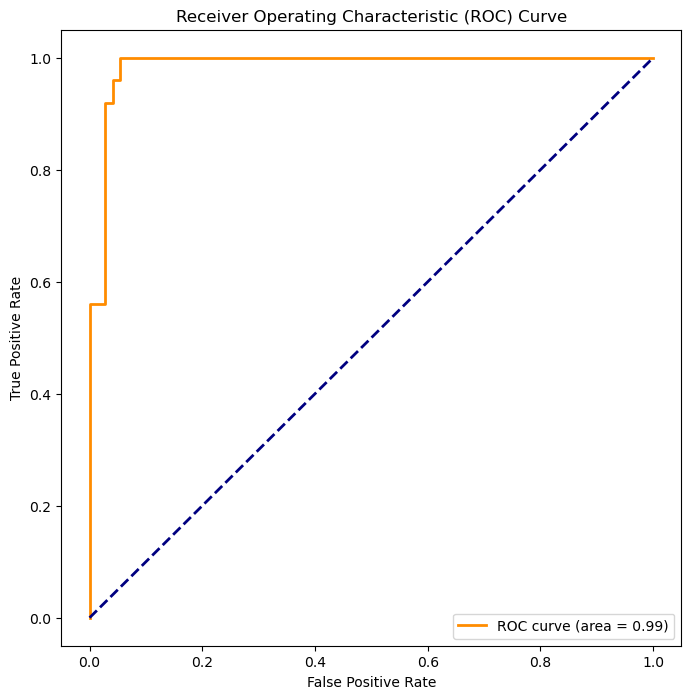

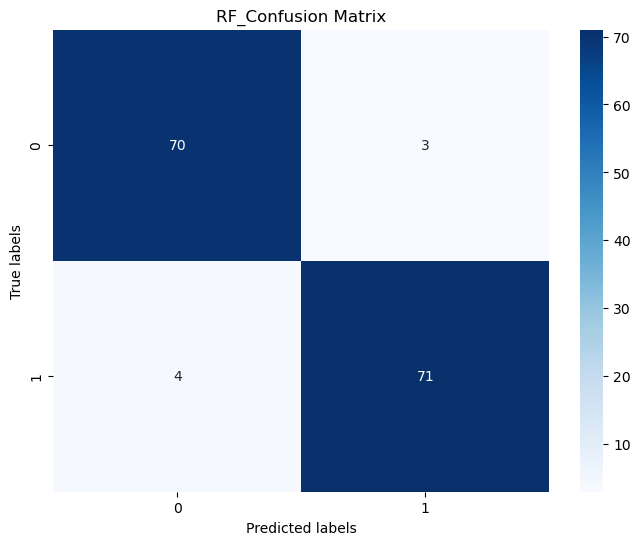

In [28]:
ros = RandomOverSampler(sampling_strategy='minority') 
# 分割特征和标签
X = df.drop('label', axis=1)
# X = X_pca
y = df['label']
X_resampled, y_resampled = ros.fit_resample(X, y)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 创建随机森林分类器
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 使用网格搜索来选择合适的超参数
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_clf = grid_search.best_estimator_

# 交叉验证评估模型性能
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_scores.mean()}")

# 预测
y_pred = best_clf.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 计算精确度
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# 计算 ROC 曲线和 AUC
y_pred_prob = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# 计算敏感性和特异性
sensitivity = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f"F1: {f1}")

print(f' Sensitivity (Recall): {sensitivity:.4f}')
print(f' Specificity: {specificity:.4f}\n')
print(classification_report(y_test, y_pred))  # 输出分类报告

# 绘制 ROC 曲线
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('RF_Confusion Matrix')
plt.show()

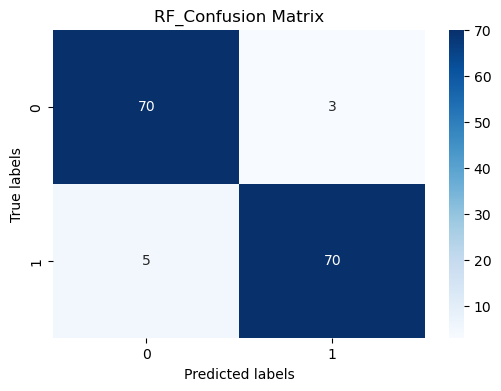

In [76]:
# 绘制混淆矩阵
plt.figure(figsize=(6, 4))
plt.subplot(2,2,1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('RF_Confusion Matrix')
plt.show()

## KNN

Cross-validated Accuracy: 0.8180935825003621
Accuracy: 0.8040540540540541
Precision: 0.96
F1: 0.768
 Sensitivity (Recall): 0.6400
 Specificity: 0.9726

              precision    recall  f1-score   support

           0       0.72      0.97      0.83        73
           1       0.96      0.64      0.77        75

    accuracy                           0.80       148
   macro avg       0.84      0.81      0.80       148
weighted avg       0.84      0.80      0.80       148



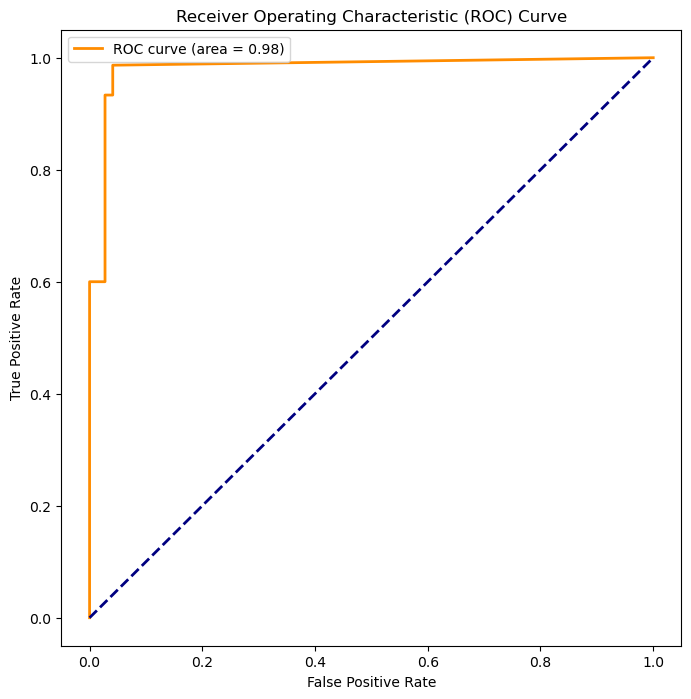

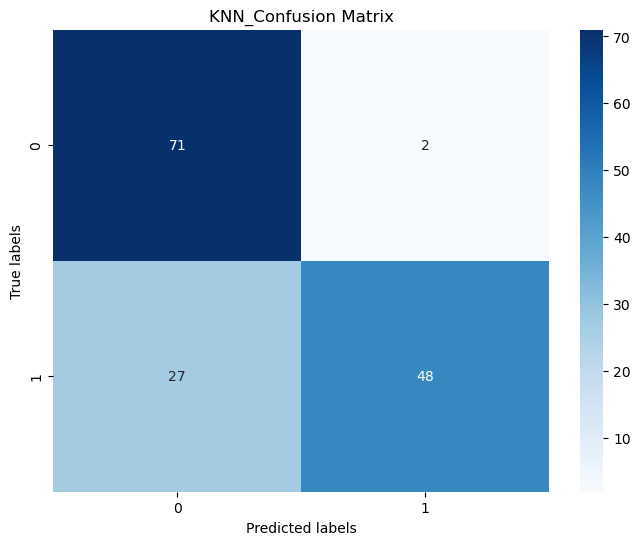

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# 创建K近邻模型
knn = KNeighborsClassifier()

# 设置超参数网格
param_grid = {
    'n_neighbors': [9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 使用网格搜索来选择最佳超参数
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_knn = grid_search.best_estimator_

# 交叉验证评估模型性能
cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_scores.mean()}")

# 预测
y_pred = best_knn.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 计算精确度
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# 计算 ROC 曲线和 AUC
y_pred_prob = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f"F1: {f1}")

# 计算敏感性和特异性
sensitivity = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

print(f' Sensitivity (Recall): {sensitivity:.4f}')
print(f' Specificity: {specificity:.4f}\n')
print(classification_report(y_test, y_pred))  # 输出分类报告

# 绘制 ROC 曲线
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('KNN_Confusion Matrix')
plt.show()

## 逻辑回归

D:\software\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\software\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\software\anaconda\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\software\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(sel

Cross-validated Accuracy: 0.7482254092423585
Accuracy: 0.7905405405405406
Precision: 0.7972972972972973
F1 Score: 0.7919463087248322
 Sensitivity (Recall): 0.7867
 Specificity: 0.7945

              precision    recall  f1-score   support

           0       0.78      0.79      0.79        73
           1       0.80      0.79      0.79        75

    accuracy                           0.79       148
   macro avg       0.79      0.79      0.79       148
weighted avg       0.79      0.79      0.79       148



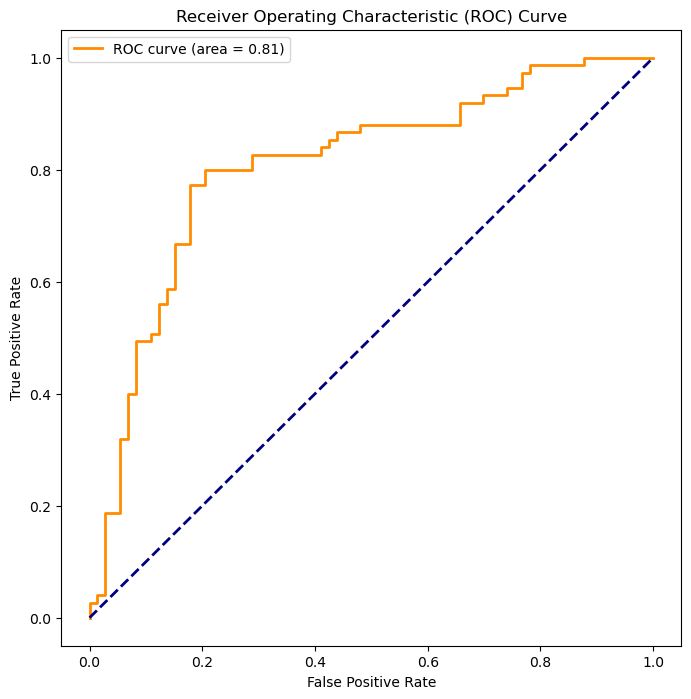

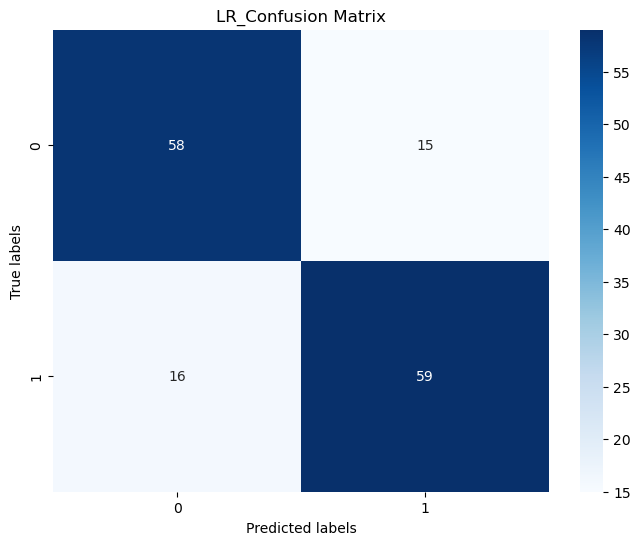

In [48]:
from sklearn.linear_model import LogisticRegression

# 创建逻辑回归模型
logistic_reg = LogisticRegression()

# 设置超参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# 使用网格搜索来选择最佳超参数
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_logistic_reg = grid_search.best_estimator_

# 交叉验证评估模型性能
cv_scores = cross_val_score(best_logistic_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_scores.mean()}")

# 预测
y_pred = best_logistic_reg.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# 计算精确度
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# 计算 ROC 曲线和 AUC
y_pred_prob = best_logistic_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# 计算敏感性和特异性
sensitivity = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

print(f' Sensitivity (Recall): {sensitivity:.4f}')
print(f' Specificity: {specificity:.4f}\n')
print(classification_report(y_test, y_pred))  # 输出分类报告

# 绘制 ROC 曲线
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('LR_Confusion Matrix')
plt.show()


D:\software\anaconda\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
D:\software\anaconda\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
D:\software\anaconda\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
D:\software\anaconda\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
D:\software\anaconda\Lib\si

Best parameters found by grid search:
{'learning_rate': 0.28, 'max_depth': 9, 'n_estimators': 250}


D:\software\anaconda\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
D:\software\anaconda\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
D:\software\anaconda\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
D:\software\anaconda\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
D:\software\anaconda\Lib\si

Cross-validated Accuracy: 0.9303346371142982
Accuracy: 0.9527027027027027
Precision: 0.9594594594594594
F1: 0.9530201342281879
 Sensitivity (Recall): 0.9467
 Specificity: 0.9589

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        73
           1       0.96      0.95      0.95        75

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148



D:\software\anaconda\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
D:\software\anaconda\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
D:\software\anaconda\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
D:\software\anaconda\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
D:\software\anaconda\Lib\si

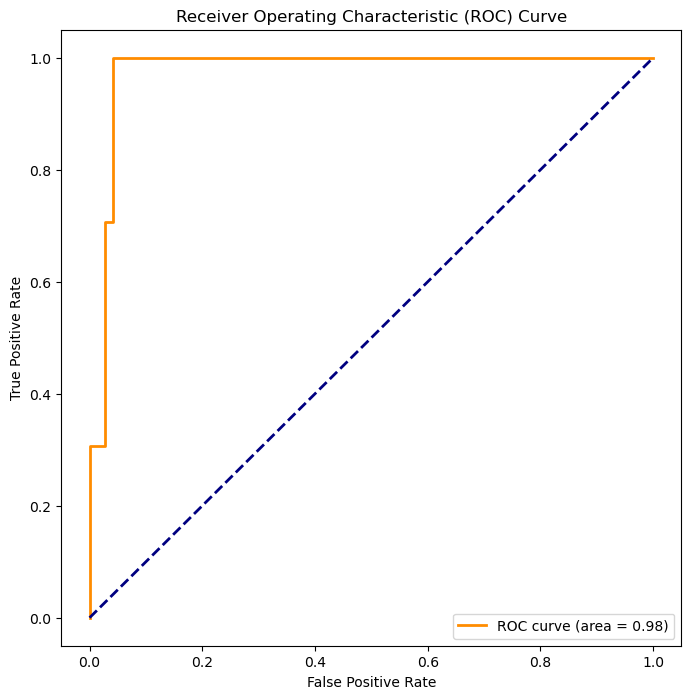

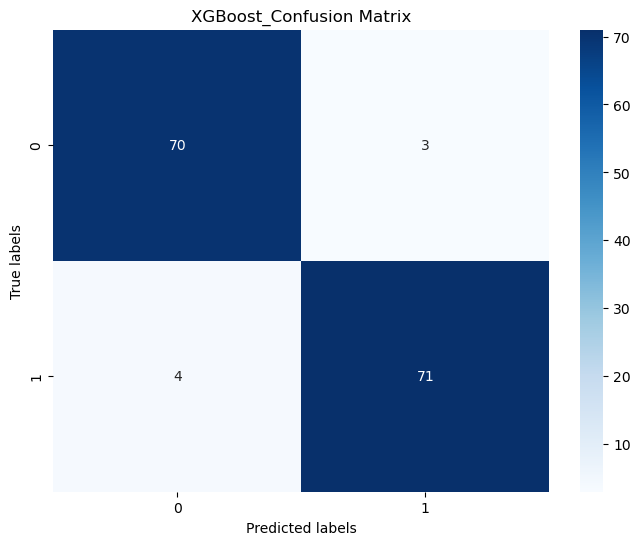

In [96]:
from xgboost import XGBClassifier

# 创建XGBoost模型
xgb = XGBClassifier()

# 设置超参数网格
param_grid = {
    'n_estimators': [ 150, 200 ,220,250],
    'max_depth': [ 7, 9,10,11,12],
    'learning_rate': [0.25,0.27,0.28]
}

# 使用网格搜索来选择最佳超参数
grid_search = GridSearchCV(xgb, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found by grid search:")
print(grid_search.best_params_)

# 获取最佳模型
best_xgb = grid_search.best_estimator_

# 交叉验证评估模型性能
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_scores.mean()}")

# 预测
y_pred = best_xgb.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# 计算精确度
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# 计算 ROC 曲线和 AUC
y_pred_prob = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f"F1: {f1}")

# 计算敏感性和特异性
sensitivity = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

print(f' Sensitivity (Recall): {sensitivity:.4f}')
print(f' Specificity: {specificity:.4f}\n')
print(classification_report(y_test, y_pred))  # 输出分类报告

# 绘制 ROC 曲线
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('XGBoost_Confusion Matrix')
plt.show()
